# Handling event data

In [1]:
from openkm3.store import KM3Store
store = KM3Store()

INFO:root:Loaded catalog from cache.


In [2]:
store.list("evts20_01")

## One week of ORCA 4-line data
| Identifier | Title | Description | 
| ---------- | ----- | ----------- | 
| evts20_01_file1 | ORCA4 events file | Events from data taking with 4 strings of ORCA | 


In [3]:
evts = store.get("evts20_01_file1")

INFO:root:Loaded entry evts20_01_file1 as <class 'openkm3.dataclasses.HDFTable'>.


In [4]:
evts.get_paraminfo()

{'angular_error': '{"description": "place to store additional fit info for jgandalf see FitParameters.csv", "ktype": null, "path": "(event).tracks.fitinf", "type": "vec double"}',
 'azimuth': '{"parameters": {"x_param": "(event).tracks.dir_x:0", "y_param": "(event).tracks.dir_y:0"}, "description": "azimuth", "expression": "((km.phi_separg(np.array([x_param]), np.array([y_param])) + np.pi)%(2*np.pi)).item()", "imports": {"km": "km3pipe.math", "np": "numpy"}}',
 'dirz': '{"description": "track direction", "ktype": null, "path": "(event).tracks.dir_z", "type": "vec"}',
 'energy': '{"description": "Energy (either MC truth or reconstructed)", "ktype": null, "path": "(event).tracks.E", "type": "double"}',
 'mjd': '{"parameters": {"t_sec": "(event).t_sec", "t_ns": "(event).t_ns", "t_track": "(event).tracks.t:0"}, "description": "Julian date", "expression": "astro.Time(t_sec+(t_ns+t_track)/1.e9, format=\'unix\').mjd", "imports": {"astro": "astropy.time"}}',
 'nhit': '{"description": "place to 

In [5]:
evts.conditions

{'instrument': {'ORCA': {'runtypes': 'PHYS.1907v1-TUNEDSEAv2.190722-ACOU4Waves-AllTrigger-L1.20',
   'contraints': {'runtype': 'PHYSICS',
    'priority': '1',
    'duration': '>2h',
    'timedifference': '|(UTCmax-UTCmin)-Livetime| < 100 s',
    'HRVfraction': '< 0.2'}}},
 'selection': {'triggermask': {'parameter': '(event).trigger_mask',
   'constraint': 'x == 22'}}}

<AxesSubplot:xlabel='azimuth', ylabel='dirz'>

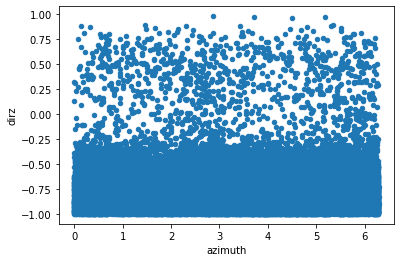

In [6]:
df = evts.get_dataframe()
df.plot(kind = "scatter", x="azimuth", y="dirz")

In [7]:
df.head(5)

,angular_error,azimuth,dirz,energy,internalID,mjd,nhit,quality,group_id
0,0.004341,5.108108,-0.968124,22.017775,km3net.44.6151.000001,58749.531438,0.004535,142.238125,0
1,0.001181,3.358250,-0.990520,128.639694,km3net.44.6151.000002,58749.531439,0.001210,372.726925,1
2,0.003534,6.146142,-0.744035,24.362326,km3net.44.6151.000003,58749.531461,0.003501,218.697835,2
3,0.008247,2.954967,-0.784588,15.714084,km3net.44.6151.000004,58749.531461,0.008116,93.015961,3
4,0.006967,5.618736,-0.529338,137.616933,km3net.44.6151.000005,58749.531441,0.006780,161.199415,4
